In [46]:
import re

In [47]:

import os
master_array = [] #append results to array to create data frame
folder = './Friends/'

for filename in os.listdir(folder):
  if filename.endswith('.txt'):
    pattern = re.compile(r'(?<=\d)\s')
    name = filename.strip('.txt')#obtain the season and episodes
    split_name = re.split(pattern, name)
    seasonep = split_name[0]
    if '-' in seasonep:
      pattern = re.compile(r'-')
      split_seasons = re.split(pattern, seasonep)
      x = split_seasons[0]
      y = split_seasons[1]
      pattern = re.compile(r'E')
      x_split = re.split(pattern, x)
      y_split = re.split(pattern, y)
      season = x_split[0]
      episode = (int(x_split[1]) + int(y_split[1]))/2
      episode_name = split_name[1]
    else:
      pattern = re.compile(r'E')
      split_season = re.split(pattern, seasonep)   
      season = split_season[0]
      # print(season)
      episode = split_season[1]
      episode_name = split_name[1]

    with open(folder + filename, 'r', encoding='UTF-8') as f:
      lines = f.readlines() #read the script file
      pattern = re.compile(r'\w+:\s') # store the regex
      for line in lines:
        result = re.match(pattern, line)
        if result is not None: # split the script where our pattern matched (pink dot)
          split_line = line.split(':')
          character = split_line[0]
          speech = split_line[1].strip()
          line= [seasonep, season, episode, episode_name, character, speech]
          master_array.append(line)
        else:
          pass


In [48]:
import pandas as pd

friends = pd.DataFrame(master_array, columns=['id', 'season', 'episode', 'episode_name', 'character', 'line'])

In [49]:
friends.sample(20)

,id,season,episode,episode_name,character,line
4432,S01E19,S01,19,The Monkey Gets Away,Rachel,"Oh, Ross, c'mon. It's my fault, I almost lost ..."
380,S01E02,S01,02,The Sonogram At The End,Monica,"No Mom, I don't have a restaurant, I work in a..."
56046,S10E09,S10,09,The Birth Mother,Chandler,You have every reason to be upset. We did lie....
7646,S02E10,S02,10,Russ,MNCA,Hey.
44014,S08E11,S08,11,Rosss Step Forward,Ross,Hey where-where are the pictures that creepy p...
22117,S04E21,S04,21,The Invitation,Chandler,"Phoebe is, making people."
43650,S08E09,S08,09,The Rumor,Rachel,Okay. So what? You guys would just like get to...
27566,S05E20,S05,20,The Ride Along,Joey,You got to go on a ride along?!
3871,S01E17,S01,17,The Two Parts Part II,Ursula,He is? Why?
39958,S07E19,S07,19,Ross And Monicas Cousin,Joey,My whole family’s from Naples!


In [50]:
# Ensure all names are refering to the correct person
print(sorted(friends['character'].unique()))
friends['character'].replace({'CHAN':'Chandler','CHANDLER':'Chandler', 'Chandlers':'Chandler',
                    'JOEY':'Joey',
                    'MNCA':'Monica','MONICA':'Monica',
                    'PHOE':'Phoebe','PHOEBE':'Phoebe', 'Pheebs':'Phoebe',
                    'Rache':'Rachel','RACHEL':'Rachel', 'RACH':'Rachel',
                    'ROSS':'Ross'},inplace=True)

['ALISON', 'ALL', 'AMBER', 'AMGER', 'Actor', 'Adrienne', 'Alan', 'Alex', 'Alice', 'All', 'Allesandro', 'Amanda', 'Amy', 'Anchorwoman', 'Andrea', 'Angela', 'Annabelle', 'Announcer', 'Arthur', 'Ashley', 'Assistant', 'Attendant', 'Aurora', 'BARRY', 'BEN', 'BILL', 'BOTH', 'BOYS', 'Ballerina', 'Bandleader', 'Barry', 'Ben', 'Benjamin', 'Bernice', 'Bill', 'Billy', 'Bitsy', 'Bob', 'Bobby', 'Bonnie', 'Boss', 'Both', 'Boy', 'Brenda', 'Burt', 'CAROL', 'CAROLINE', 'CHAN', 'CHANDLER', 'Cailin', 'Caitlin', 'Carl', 'Carol', 'Casey', 'Cashier', 'Cassie', 'Catherine', 'Cecilia', 'Celia', 'Chandler', 'Chandlers', 'Charlie', 'Cheryl', 'Chip', 'Chloe', 'Claudia', 'Clerk', 'Cliff', 'Clown', 'Colleen', 'Commercial', 'Conan', 'Cookie', 'Cop', 'Courtney', 'Cowgirl', 'Croupler', 'Customer', 'Customers', 'Cynthia', 'DIRECTOR', 'DOCTOR', 'DUNCAN', 'Dan', 'Dana', 'Danielle', 'Danny', 'Dave', 'David', 'Devon', 'Dina', 'Director', 'Dirk', 'Doctor', 'Don', 'Donny', 'Doug', 'Drew', 'EDDIE', 'ERICA', 'ERNIE', 'ESTELLE

In [51]:
friends['character'].value_counts()[:6]

Rachel      9285
Ross        9098
Chandler    8461
Monica      8386
Joey        8215
Phoebe      7473
Name: character, dtype: int64

In [52]:
def remove_stagedir(txt):
    ret = ''
    skip1c = 0
    skip2c = 0
    for i in txt:
        if i == '[':
            skip1c += 1
        elif i == '(':
            skip2c += 1
        elif i == ']' and skip1c > 0:
            skip1c -= 1
        elif i == ')'and skip2c > 0:
            skip2c -= 1
        elif skip1c == 0 and skip2c == 0:
            ret += i
    return ret
    
friends['line'] = friends.line.apply(remove_stagedir)

friends.sample(20)


,id,season,episode,episode_name,character,line
47134,S08E23,S08,23,Rachel Has A Baby,Rachel,"Okay. Well be careful with her, she’s really t..."
51153,S09E16,S09,16,The Boob Job,Chandler,What would she get for herself for two thousan...
54954,S10E06,S10,06,Rosss Gran,Chandler,Hey honey!
27851,S05E21,S05,21,The Ball,Joey,Hey!
47230,S08E23,S08,23,Rachel Has A Baby,Ross,It’s…it’s complicated okay?
41815,S08E02,S08,02,The Red Sweater,Tag,What’s going on Rach?
18812,S04E07,S04,07,Chandler Crosses The Line,Joey,"Is that why you bought all this stuff?! Well,..."
42246,S08E04,S08,04,The Videotape,Joey,I was just outside Barcelona hiking in the foo...
52622,S09E21,S09,21,The Fertility Tes,Monica,I'm sorry too.
38278,S07E13,S07,13,Rosita Dies,Chandler,I think I should get the chair!


In [53]:
friends['season'] = friends['season'].apply(lambda x : re.sub(r'S0*', '', str(x)))
friends['episode'] = friends['episode'].apply(lambda x : re.sub(r'0*', '', str(x)))
friends.head()

,id,season,episode,episode_name,character,line
0,S01E01,1,1,Monica Gets A Roommate,Monica,There's nothing to tell! He's just some guy I ...
1,S01E01,1,1,Monica Gets A Roommate,Joey,"C'mon, you're going out with the guy! There's ..."
2,S01E01,1,1,Monica Gets A Roommate,Chandler,"All right Joey, be nice. So does he have a hu..."
3,S01E01,1,1,Monica Gets A Roommate,Phoebe,"Wait, does he eat chalk?"
4,S01E01,1,1,Monica Gets A Roommate,Phoebe,"Just, 'cause, I don't want her to go through w..."


In [54]:
friends['len'] = friends.line.apply(len)
friends.head()
friends['len'].sum()

3047509

### preprocessing friends

In [55]:
import os
import json
import glob
import shutil

# limit to only three tags in Universal Part-of-Speech tagset
allowed = set('ADJ NOUN VERB'.split())

In [62]:
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def prep(txt):
    toklst = []
    tokens = nlp(txt)
    if tokens:
        for t in tokens:
            if t.pos_ in allowed and t.is_alpha and not t.is_stop:
                toklst.append(t.text)
    return ' '.join(toklst).casefold()
                

c:\Users\Gebruiker\anaconda3\lib\site-packages\spacy\util.py:833: UserWarning: [W095] Model 'en_core_web_sm' (3.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.2.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [63]:
friends['prepped'] = friends.line.apply(prep)

In [67]:
friends['prepped'] = friends.prepped.str.casefold()
friends.head()

,id,season,episode,episode_name,character,line,len,prepped,len_prep
0,S01E01,1,1,Monica Gets A Roommate,Monica,There's nothing to tell! He's just some guy I ...,56,tell guy work,13
1,S01E01,1,1,Monica Gets A Roommate,Joey,"C'mon, you're going out with the guy! There's ...",80,going guy got wrong,19
2,S01E01,1,1,Monica Gets A Roommate,Chandler,"All right Joey, be nice. So does he have a hu...",73,nice hump hump hairpiece,24
3,S01E01,1,1,Monica Gets A Roommate,Phoebe,"Wait, does he eat chalk?",24,wait eat chalk,14
4,S01E01,1,1,Monica Gets A Roommate,Phoebe,"Just, 'cause, I don't want her to go through w...",79,want went,9


In [65]:
friends['len_prep'] = friends.prepped.apply(len)
friends.head()
friends['len_prep'].sum()

953229

In [88]:
#calculate average episode length
friends_red = friends[friends['id'].str.isalnum() == True]
# print(friends_red['id'].unique())

grouped = friends_red.groupby('id')
print(np.mean(grouped['len_prep'].agg(sum)))

['S01E01' 'S01E02' 'S01E03' 'S01E04' 'S01E05' 'S01E06' 'S01E07' 'S01E08'
 'S01E09' 'S01E10' 'S01E11' 'S01E12' 'S01E13' 'S01E14' 'S01E15' 'S01E16'
 'S01E17' 'S01E18' 'S01E19' 'S01E20' 'S01E21' 'S01E22' 'S01E23' 'S01E24'
 'S02E01' 'S02E02' 'S02E03' 'S02E04' 'S02E05' 'S02E06' 'S02E07' 'S02E08'
 'S02E09' 'S02E10' 'S02E11' 'S02E14' 'S02E15' 'S02E16' 'S02E17' 'S02E18'
 'S02E19' 'S02E20' 'S02E21' 'S02E22' 'S02E23' 'S02E24' 'S03E01' 'S03E02'
 'S03E03' 'S03E04' 'S03E05' 'S03E06' 'S03E07' 'S03E08' 'S03E09' 'S03E10'
 'S03E11' 'S03E12' 'S03E13' 'S03E14' 'S03E15' 'S03E16' 'S03E17' 'S03E18'
 'S03E19' 'S03E20' 'S03E21' 'S03E22' 'S03E23' 'S03E24' 's03E25' 'S04E01'
 'S04E02' 'S04E03' 'S04E04' 'S04E05' 'S04E06' 'S04E07' 'S04E08' 'S04E09'
 'S04E10' 'S04E11' 'S04E12' 'S04E13' 'S04E14' 'S04E15' 'S04E16' 'S04E17'
 'S04E18' 'S04E19' 'S04E20' 'S04E21' 'S04E22' 'S04E23' 'S05E01' 'S05E02'
 'S05E03' 'S05E04' 'S05E05' 'S05E06' 'S05E07' 'S05E08' 'S05E09' 'S05E10'
 'S05E11' 'S05E12' 'S05E13' 'S05E14' 'S05E15' 'S05E

In [80]:
friends.to_csv('friends.tsv', sep='\t')

### topic model with books corpus

In [89]:
import glob
import random
RND = 12345
random.seed(RND)

class Chunker(object):
    def __init__(self, filenames, metadata, singles_only=False,
                 max_chars_per_book=None, chunk_size=None):
        
        # maximum number of characters to read from the beginning of each book:
        self.max_chars_per_book = max_chars_per_book
        
        # size of the chunks returned (in tokens):
        self.chunk_size = chunk_size
        
        # only return chunks from these files:
        self.filenames = filenames
        
        # include a dictionary with metadata:
        self.meta = meta
        
        # only return texts with a single genre label:
        self.singles_only = singles_only
        
        # only collect genres during the first iteration
        self.first = True

    def __iter__(self):
        if self.first:
            self.genres = []
        
        for filename in self.filenames:
            title = os.path.basename(filename)
            current_genres = self.meta[title]
            
            if self.singles_only:
                if len(current_genres) > 1:
                    continue

            with open(filename, 'r', encoding='utf-8') as f:
                try:
                    if self.max_chars_per_book:
                        text = f.read()
                        text = text[:self.max_chars_per_book]
                    else:
                        text = f.read()
                except:
                    continue
            
            tokens = text.split()
            
            for i in range(0, len(tokens), self.chunk_size):
                if self.first:
                    self.genres.append(current_genres)
                yield tokens[i:i + self.chunk_size]
                #this also helps for lazy loading because yield goes over it apart
        
        # stop collecting labels after first complete iteration
        self.first = False

In [90]:
n_features = 5000 # number of most common words
n_topics = 30 # number of topics
n_top_words = 60 # number of characteristic words per topic (viz purposes only)
max_df = 0.5 # maximum document frequency
min_df = 100 # minimum document frequency
max_books = 1000 # include all books (None), or a specific number
chunk_size = 4111  # size of average Friends episode (after keeping only ADJ, NOUN & VERB)

In [91]:
path = '../session-09-20220505T113620Z-001/session-09/hp_topic_model/books/books/*.txt'
filenames = sorted(list(glob.glob(path)))
print(len(filenames))

6800


In [92]:
random.seed(RND)
random.shuffle(filenames)
# print(filenames[:10])
# print(len(filenames))

In [93]:
import json
with open('../session-09-20220505T113620Z-001/session-09/hp_topic_model/books_meta.json', 'r') as f:
    meta = json.loads(f.read())

# for book, genres in list(meta.items())[:20]:
#     print(f"{book} -> {' - '.join(sorted(genres))}")

100290.txt -> Adventure
108104.txt -> Adventure
112365.txt -> Adventure
113909.txt -> Adventure - Thriller
115062.txt -> Adventure
115933.txt -> Adventure
116700.txt -> Adventure
117250.txt -> Adventure
119290.txt -> Adventure
120163.txt -> Adventure
122450.txt -> Adventure
126259.txt -> Adventure
127912.txt -> Adventure
127958.txt -> Adventure
129009.txt -> Adventure
130411.txt -> Adventure
130847.txt -> Adventure
13577.txt -> Adventure
136764.txt -> Adventure - Thriller
137808.txt -> Adventure


In [97]:
import os
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def identity(x):
    return x

chunks = Chunker(filenames, meta,
                 chunk_size=chunk_size,
                 max_chars_per_book=None)


vectorizer = TfidfVectorizer(max_df=max_df, min_df=min_df,
                             max_features=n_features,
                             analyzer=identity)
X = vectorizer.fit_transform(chunks)

from sklearn.decomposition import NMF
nmf = NMF(n_components=300,
          random_state=RND,
          verbose=1, max_iter=50).fit(X) # fit NMF model with TF-IDF features

violation: 1.0
violation: 0.28730248676995723
violation: 0.2537472183395769
violation: 0.2685931618089284
violation: 0.2079692273736525
violation: 0.16727847426757655
violation: 0.14330565341609472
violation: 0.12564292681386915
violation: 0.11234834484438232
violation: 0.10116309217206347
violation: 0.09081651472738822
violation: 0.08139835469498075
violation: 0.07196665611981473
violation: 0.0631483886724756
violation: 0.05557928875175744
violation: 0.048789309553322224
violation: 0.043593159155260616
violation: 0.039962297385455245
violation: 0.03723194513985513
violation: 0.034442896156731295
violation: 0.031459362673693037
violation: 0.02874851659819503
violation: 0.02621457458757147
violation: 0.02377033239642793
violation: 0.021470673780333398
violation: 0.019463934913726146
violation: 0.017804190937406494
violation: 0.01640580288957631
violation: 0.015227501086407582
violation: 0.014235881890695468
violation: 0.013341123401191058
violation: 0.012553307796187602
violation: 0.011

c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 50 reached. Increase it to improve convergence.
  warnings.warn(


In [126]:
for topic_idx, topic in enumerate(nmf.components_[:10]):
    top_idxs = np.argsort(topic)[::-1][:10]
    top_words = np.array(vectorizer.get_feature_names())[top_idxs]
    print(f'topic {topic_idx}:', ' - '.join(top_words))

topic 0: which - admit - involved - figured - willing - admitted - risk - obvious - hesitated - that
topic 1: pulls - kisses - laughs - leans - grabs - walks - smiles - pushes - whispers - lifts
topic 2: vampire - fangs - bite - scent - stake - centuries - feed - hunger - chains - wrist
topic 3: turns - takes - walks - feels - sits - stands - begins - sees - opens - puts
topic 4: vampires - vampire - stake - supernatural - werewolves - hunters - fangs - attack - members - blond
topic 5: gun - bullet - guns - shoot - trigger - bullets - weapon - fired - barrel - shooting
topic 6: mom - hug - honey - driveway - boyfriend - weird - crying - backpack - sweetie - homework
topic 7: ship - crew - cargo - vessel - ships - hatch - board - pilot - port - engines
topic 8: horses - rode - stable - stables - ride - saddle - riding - trail - animals - reins
topic 9: twins - twin - babies - identical - born - birth - our - secret - siblings - daughters


c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [127]:
chunks = Chunker(filenames, meta,
                 singles_only=True,
                 chunk_size=chunk_size,
                 max_chars_per_book=None)
X = vectorizer.transform(chunks)
X = transformer.transform(X)
print(X.shape)

(24956, 5000)


In [128]:
nmf.verbose = 1
X_ = nmf.transform(X)
print(X_.shape)

violation: 1.0
violation: 0.4645583753691494
violation: 0.27825674957456586
violation: 0.08548390478972681
violation: 0.023456861682423582
violation: 0.009808499040296771
violation: 0.0055288196702975865
violation: 0.0022404828708748555
violation: 0.0008354135893211632
violation: 0.0004936290400157777
violation: 0.0002553323261803844
violation: 0.0001018813817518539
violation: 4.614421567753404e-05
Converged at iteration 14
(24956, 300)


In [129]:
from sklearn.feature_selection import f_classif

genres = [g[0] for g in chunks.genres]
feature_names = vectorizer.get_feature_names()

for genre in set(genres):
    print(f'-> genre {genre}:')
    y = [1 if g == genre else 0 for g in genres]
    # univariate feature selection with F-test for feature scoring
    F, pval = f_classif(X_, y)
    
    # indices of three best topics
    for topic_idx in np.argsort(F)[::-1][:3]:
        topic = np.nan_to_num(nmf.components_[topic_idx])
        words = [feature_names[i] for i in topic.argsort()[:-10:-1]]
        print('   ' + ' - '.join(words))

c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


-> genre Fantasy:
   sword - swords - blade - hilt - battle - armor - weapon - attack - fighting
   magic - magical - giant - ward - powerful - kingdom - knives - electricity - circle
   wizard - staff - magical - hat - robe - crystal - evil - fairy - master
-> genre Horror:
   zombies - zombie - bitten - infected - brains - virus - survivors - bite - corpses
   undead - infected - stake - virus - flesh - corpse - flames - earth - survivors
   darkness - shadows - moon - flames - shadow - wind - stars - mist - smoke
-> genre Historical:
   horse - saddle - reins - riding - ride - rode - mount - stables - stable
   horses - rode - stable - stables - ride - saddle - riding - trail - animals
   army - battle - troops - enemy - forces - attack - commander - command - march
-> genre New_Adult:
   pulls - kisses - laughs - leans - grabs - walks - smiles - pushes - whispers
   gives - pulls - takes - shakes - leans - presses - holds - feels - lets
   stare - grab - shake - push - breathe - no

In [131]:
import pandas as pd
nmf.verbose = 0
df = pd.DataFrame(columns=['episode', 'txt'])

grouped = friends.groupby('id')


texts = []

for name, group in grouped:
   text = ' '.join(group['prepped'])
   text = text.split()
   texts.append(text)
   df.loc[len(df)] = [name, text]

scores = nmf.transform(vectorizer.transform(texts))  # transform the HP chapters according to the fitted NMF model
print(scores.shape)
print(scores)

(228, 300)
[[0.         0.         0.         ... 0.00046911 0.         0.        ]
 [0.         0.00228167 0.         ... 0.         0.         0.        ]
 [0.         0.00071125 0.         ... 0.00027823 0.         0.        ]
 ...
 [0.         0.00136966 0.         ... 0.         0.         0.00011613]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.00204258 0.00545986 0.        ]]


In [132]:
df_scores = pd.DataFrame(scores, columns=[f't{i+1}' for i in range(scores.shape[1])])
df = df.join(df_scores)
df.head()

,episode,txt,t1,t2,t3,t4,t5,t6,t7,t8,...,t291,t292,t293,t294,t295,t296,t297,t298,t299,t300
0,S01E01,"[tell, guy, work, going, guy, got, wrong, nice...",0.0,0.000000,0.0,0.000033,0.0,0.000000,0.012024,0.000012,...,0.000000,0.000242,0.0,0.000000,0.000000,0.0,0.000000,0.000469,0.0,0.0
1,S01E02,"[guys, understand, kissing, important, need, k...",0.0,0.002282,0.0,0.000070,0.0,0.000000,0.015688,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
2,S01E03,"[guys, good, walked, subway, said, said, good,...",0.0,0.000711,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000485,0.000000,0.0,0.000236,0.000000,0.0,0.000000,0.000278,0.0,0.0
3,S01E04,"[omnipotent, day, want, world, peace, hunger, ...",0.0,0.000000,0.0,0.000005,0.0,0.001763,0.015198,0.000004,...,0.057121,0.000000,0.0,0.000000,0.000208,0.0,0.000000,0.000079,0.0,0.0
4,S01E05,"[let, big, deal, big, deal, amazing, reach, li...",0.0,0.000000,0.0,0.000000,0.0,0.000693,0.000141,0.000000,...,0.000893,0.000482,0.0,0.001857,0.000000,0.0,0.008134,0.037344,0.0,0.0


In [133]:
from operator import itemgetter
from scipy.stats import kendalltau

ranks = range(1, len(df.index)+1)
tau_scores = []
for col in [f't{i+1}' for i in range(scores.shape[1])]:
    tau, p = kendalltau(ranks, df[col].tolist())
    tau_scores.append((col, tau))
    
tau_scores.sort(key=itemgetter(1))
nb = 6
top, bottom = tau_scores[:nb], tau_scores[-nb:]
print(tau_scores[:10]) # print 10 topics with lowest Tau score

[('t265', -0.16860323295118115), ('t239', -0.11995392700072682), ('t244', -0.08840826254762252), ('t234', -0.08730792078173505), ('t253', -0.08227042619132592), ('t264', -0.07834557411873722), ('t258', -0.06058946518891243), ('t233', -0.05952953784492053), ('t256', -0.058067574906621726), ('t252', -0.04674893200812449)]


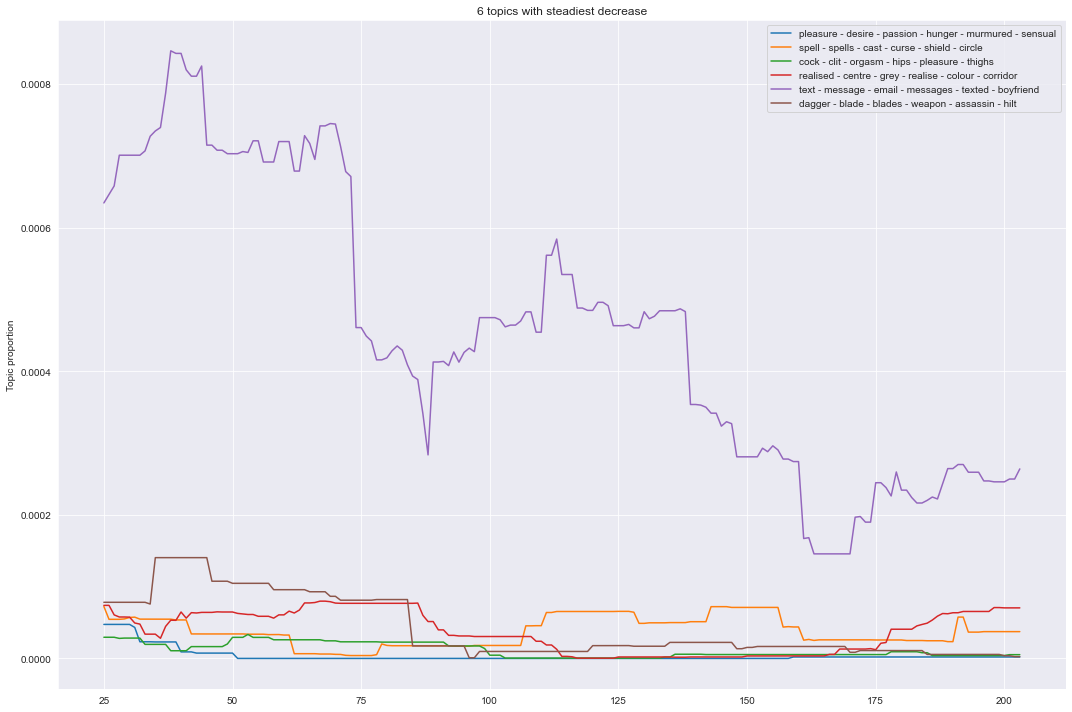

In [134]:
import matplotlib.pyplot as plt

import seaborn as sb
feature_names = vectorizer.get_feature_names_out()
fig = plt.figure(figsize=(15, 10))
sb.set_style("darkgrid")
for (feat, tau), col in zip(top, sb.color_palette("Set1")[:nb]):
    topic = nmf.components_[int(feat.replace('t', '')) - 1, :]
    words = [feature_names[i] for i in topic.argsort()[:-6-1:-1]]
    label = ' - '.join(words)
    df[feat].rolling(window=50, center=True).mean().plot(label=label)
plt.xlabel('', fontsize=10)
plt.ylabel('Topic proportion', fontsize=10)
plt.title(f'{nb} topics with steadiest decrease')
plt.tight_layout()
plt.legend();

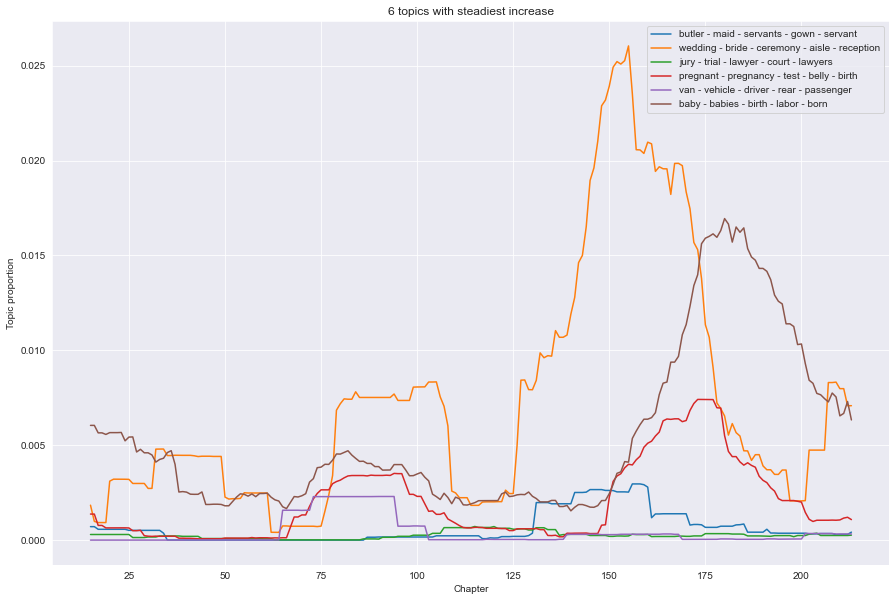

In [135]:
fig = plt.figure(figsize=(15, 10))
sb.set_style("darkgrid")
for (feat, tau), col in zip(bottom, sb.color_palette("Set1")[:nb]):
    topic = nmf.components_[int(feat.replace('t', '')) - 1, :]
    words = [feature_names[i] for i in topic.argsort()[:-5-1:-1]]
    label = ' - '.join(words)
    df[feat].rolling(window=30, center=True).mean().plot(label=label)
plt.xlabel('Chapter', fontsize=10)
plt.ylabel('Topic proportion', fontsize=10)
plt.title(f'{nb} topics with steadiest increase')
plt.legend();

In [140]:
feature_names = vectorizer.get_feature_names_out()
X = df.drop(columns=['episode', 'txt'])

for episode in df.episode.values:
    print(f'-> episode {episode}:')
    y = [1 if g == episode else 0 for g in df.episode.values]
    # univariate feature selection with F-test for feature scoring
    F, pval = f_classif(X, y)
    
    # indices of three best topics
    for topic_idx in np.argsort(F)[::-1][:3]:
        topic = np.nan_to_num(nmf.components_[topic_idx])
        words = [feature_names[i] for i in topic.argsort()[:-10:-1]]
        print('   ' + ' - '.join(words))

-> episode S01E01:
   jaw - shifted - tugged - swallowed - blinked - tightened - brushed - shoved - lowered
   coffee - cup - mug - counter - sip - shop - pot - breakfast - sugar
   stare - grab - shake - push - breathe - nod - slide - glance - sigh
-> episode S01E02:
   jaw - shifted - tugged - swallowed - blinked - tightened - brushed - shoved - lowered
   cave - cavern - caves - rock - entrance - rocks - flashlight - boulder - ceiling
   aunt - niece - ought - ton - dear - patience - nephew - cousins - aura
-> episode S01E03:
   jaw - shifted - tugged - swallowed - blinked - tightened - brushed - shoved - lowered
   farm - land - fields - sheep - property - field - corn - animals - supper
   cigarette - smoke - cigarettes - smoking - lit - smoked - lighter - cigar - drag
-> episode S01E04:
   jaw - shifted - tugged - swallowed - blinked - tightened - brushed - shoved - lowered
   magic - magical - giant - ward - powerful - kingdom - knives - electricity - circle
   village - hut - t

c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [254] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [254] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [254] are constant.
  warnings.warn("Features %s are constant." % con

   jaw - shifted - tugged - swallowed - blinked - tightened - brushed - shoved - lowered
   pleasure - desire - passion - hunger - murmured - sensual - breasts - arousal - scent
   ed - ing - owed - s - final - actual - total - usual - careful
-> episode S01E16:
   jaw - shifted - tugged - swallowed - blinked - tightened - brushed - shoved - lowered
   creature - creatures - monster - its - monsters - flesh - giant - evil - claws
   twins - twin - babies - identical - born - birth - our - secret - siblings
-> episode S01E17:
   jaw - shifted - tugged - swallowed - blinked - tightened - brushed - shoved - lowered
   hospital - ambulance - doctors - nurses - surgery - accident - patients - medical - patient
   bridge - railing - path - cross - creek - crossing - engines - crew - console
-> episode S01E18:
   jaw - shifted - tugged - swallowed - blinked - tightened - brushed - shoved - lowered
   warrior - warriors - tribe - battle - weapons - drew - enemy - fortress - leader
   ty - part

c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [254] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [254] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [254] are constant.
  warnings.warn("Features %s are constant." % con

   jaw - shifted - tugged - swallowed - blinked - tightened - brushed - shoved - lowered
   rope - ropes - tied - climb - cliff - ledge - wrists - ladder - climbing
   tree - branches - trees - branch - trunk - leaves - bark - roots - oak
-> episode S03E12:
   jaw - shifted - tugged - swallowed - blinked - tightened - brushed - shoved - lowered
   captain - crew - vessel - general - port - orders - quarters - command - sail
   dance - dancing - music - danced - ballroom - song - couples - fun - partner
-> episode S03E13:
   jaw - shifted - tugged - swallowed - blinked - tightened - brushed - shoved - lowered
   dagger - blade - blades - weapon - assassin - hilt - weapons - rogue - chains
   darkness - shadows - moon - flames - shadow - wind - stars - mist - smoke
-> episode S03E14:
   jaw - shifted - tugged - swallowed - blinked - tightened - brushed - shoved - lowered
   grace - murmured - curse - insisted - photograph - gallery - aura - pie - flame
   powers - evil - abilities - powe

c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [254] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [254] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [254] are constant.
  warnings.warn("Features %s are constant." % con

   jaw - shifted - tugged - swallowed - blinked - tightened - brushed - shoved - lowered
   duke - devil - coach - reputation - title - bloody - ladies - skirts - gentleman
   humans - leader - species - race - beings - humanity - creatures - animals - killing
-> episode S04E13:
   jaw - shifted - tugged - swallowed - blinked - tightened - brushed - shoved - lowered
   stage - audience - theater - performance - applause - microphone - dressing - production - curtain
   train - station - platform - tracks - passengers - ticket - rail - compartment - cars
-> episode S04E14:
   jaw - shifted - tugged - swallowed - blinked - tightened - brushed - shoved - lowered
   club - clubs - members - strip - golf - drugs - member - boss - warehouse
   lake - shore - dock - fish - surface - fishing - swim - swimming - trees
-> episode S04E15:
   jaw - shifted - tugged - swallowed - blinked - tightened - brushed - shoved - lowered
   wolves - hunt - deer - fur - animals - werewolves - howl - fighting 

c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [254] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [254] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [254] are constant.
  warnings.warn("Features %s are constant." % con

   jaw - shifted - tugged - swallowed - blinked - tightened - brushed - shoved - lowered
   grandfather - grandparents - fairy - estate - secret - history - born - older - ancient
   elevator - lobby - button - hallway - hall - floors - stairwell - suit - panel
-> episode S05E06:
   jaw - shifted - tugged - swallowed - blinked - tightened - brushed - shoved - lowered
   axe - hammer - infected - armor - swung - battle - weapons - wood - mouse
   suppose - ought - coat - faint - drew - silk - sudden - pale - supper
-> episode S05E07:
   jaw - shifted - tugged - swallowed - blinked - tightened - brushed - shoved - lowered
   warrior - warriors - tribe - battle - weapons - drew - enemy - fortress - leader
   detective - partner - investigation - station - murder - private - crime - murdered - suspect
-> episode S05E08:
   jaw - shifted - tugged - swallowed - blinked - tightened - brushed - shoved - lowered
   dwarf - assassin - giant - knives - bloody - hammer - coin - folks - beard
   ki

c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [254] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [254] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [254] are constant.
  warnings.warn("Features %s are constant." % con

   ring - diamond - engagement - match - rings - jewelry - necklace - diamonds - engaged
   guards - guard - prisoners - weapons - prisoner - assassin - escape - armed - compound
-> episode S06E24:
   jaw - shifted - tugged - swallowed - blinked - tightened - brushed - shoved - lowered
   boat - dock - boats - fishing - shore - fish - sail - sailing - harbor
   marry - marrying - marriage - proposal - future - engagement - married - happiness - engaged
-> episode S07E01:
   jaw - shifted - tugged - swallowed - blinked - tightened - brushed - shoved - lowered
   faith - fantasy - pop - religion - prayer - religious - pray - divine - peace
   bar - bartender - drinks - stool - pub - tables - drunk - waitress - bars
-> episode S07E02:
   jaw - shifted - tugged - swallowed - blinked - tightened - brushed - shoved - lowered
   wedding - bride - ceremony - aisle - reception - guests - married - flowers - marrying
   barn - hay - porch - stall - yard - straw - cow - field - ladder
-> episode 

c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [254] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [254] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [254] are constant.
  warnings.warn("Features %s are constant." % con

   soldiers - troops - weapons - bodies - rifles - guns - firing - wounded - commander
-> episode S07E24:
   jaw - shifted - tugged - swallowed - blinked - tightened - brushed - shoved - lowered
   replied - exclaimed - remarked - explained - responded - reply - suggested - retorted - interrupted
   lord - cloak - sons - grey - hall - servants - lands - d - realm
-> episode S08E01:
   jaw - shifted - tugged - swallowed - blinked - tightened - brushed - shoved - lowered
   pregnant - pregnancy - test - belly - birth - babies - appointment - tests - month
   dance - dancing - music - danced - ballroom - song - couples - fun - partner
-> episode S08E02:
   jaw - shifted - tugged - swallowed - blinked - tightened - brushed - shoved - lowered
   picture - photo - pictures - photos - photograph - photographs - envelope - page - magazine
   bond - telephone - m - yards - centre - double - guardian - grey - rubber
-> episode S08E03:
   jaw - shifted - tugged - swallowed - blinked - tightened -

c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [254] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [254] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [254] are constant.
  warnings.warn("Features %s are constant." % con

   jaw - shifted - tugged - swallowed - blinked - tightened - brushed - shoved - lowered
   tea - cup - sip - cups - sipped - hat - tray - sugar - shop
   store - shop - counter - shopping - customers - grocery - customer - register - mall
-> episode S08E18:
   jaw - shifted - tugged - swallowed - blinked - tightened - brushed - shoved - lowered
   stone - stones - ancient - rock - statue - carved - crystal - iron - temple
   arrow - arrows - bow - target - shoot - aim - shaft - string - weapons
-> episode S08E19:
   jaw - shifted - tugged - swallowed - blinked - tightened - brushed - shoved - lowered
   river - bank - shore - current - fish - banks - mud - west - waters
   e - mail - message - internet - o - address - messages - a - m
-> episode S08E20:
   jaw - shifted - tugged - swallowed - blinked - tightened - brushed - shoved - lowered
   card - cards - credit - poker - wallet - game - envelope - chips - bet
   mortal - immortal - mortals - goddess - murmured - centuries - fangs 

c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [254] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [254] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [254] are constant.
  warnings.warn("Features %s are constant." % con

   city - streets - buildings - cities - alley - towers - map - roman - houses
   penny - alright - grasped - exclaimed - sweetheart - rage - terrible - candy - allow
-> episode S10E11:
   jaw - shifted - tugged - swallowed - blinked - tightened - brushed - shoved - lowered
   officer - officers - uniform - patrol - squad - duty - military - report - rank
   snow - winter - coat - wind - frozen - boots - freezing - weather - icy
-> episode S10E12:
   jaw - shifted - tugged - swallowed - blinked - tightened - brushed - shoved - lowered
   arrow - arrows - bow - target - shoot - aim - shaft - string - weapons
   wedding - bride - ceremony - aisle - reception - guests - married - flowers - marrying
-> episode S10E13:
   jaw - shifted - tugged - swallowed - blinked - tightened - brushed - shoved - lowered
   killer - murder - crime - victim - victims - evidence - scene - investigation - murdered
   yelled - ok - screamed - yelling - scared - everyone - responded - laughing - flew
-> episod

c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [254] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [254] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [254] are constant.
  warnings.warn("Features %s are constant." % con

In [141]:
# import joblib
# filename = 'nmf_books_friends.sav'
# joblib.dump(nmf, filename)

['nmf_books_friends.sav']

In [142]:
loaded_model = joblib.load(filename)

In [143]:
loaded_model.get_feature_names_out()

array(['nmf0', 'nmf1', 'nmf2', 'nmf3', 'nmf4', 'nmf5', 'nmf6', 'nmf7',
       'nmf8', 'nmf9', 'nmf10', 'nmf11', 'nmf12', 'nmf13', 'nmf14',
       'nmf15', 'nmf16', 'nmf17', 'nmf18', 'nmf19', 'nmf20', 'nmf21',
       'nmf22', 'nmf23', 'nmf24', 'nmf25', 'nmf26', 'nmf27', 'nmf28',
       'nmf29', 'nmf30', 'nmf31', 'nmf32', 'nmf33', 'nmf34', 'nmf35',
       'nmf36', 'nmf37', 'nmf38', 'nmf39', 'nmf40', 'nmf41', 'nmf42',
       'nmf43', 'nmf44', 'nmf45', 'nmf46', 'nmf47', 'nmf48', 'nmf49',
       'nmf50', 'nmf51', 'nmf52', 'nmf53', 'nmf54', 'nmf55', 'nmf56',
       'nmf57', 'nmf58', 'nmf59', 'nmf60', 'nmf61', 'nmf62', 'nmf63',
       'nmf64', 'nmf65', 'nmf66', 'nmf67', 'nmf68', 'nmf69', 'nmf70',
       'nmf71', 'nmf72', 'nmf73', 'nmf74', 'nmf75', 'nmf76', 'nmf77',
       'nmf78', 'nmf79', 'nmf80', 'nmf81', 'nmf82', 'nmf83', 'nmf84',
       'nmf85', 'nmf86', 'nmf87', 'nmf88', 'nmf89', 'nmf90', 'nmf91',
       'nmf92', 'nmf93', 'nmf94', 'nmf95', 'nmf96', 'nmf97', 'nmf98',
       'nmf99', 'nmf1

In [18]:
friends2 = pd.read_csv(folder + 'friends_episodes_v3.csv')
friends2.head()

,Year_of_prod,Season,Episode Number,Episode_Title,Duration,Summary,Director,Stars,Votes
0,1994,1,1,The One Where Monica Gets a Roommate: The Pilot,22,"Monica and the gang introduce Rachel to the ""r...",James Burrows,8.3,7440
1,1994,1,2,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel...,James Burrows,8.1,4888
2,1994,1,3,The One with the Thumb,22,Monica becomes irritated when everyone likes h...,James Burrows,8.2,4605
3,1994,1,4,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game t...,James Burrows,8.1,4468
4,1994,1,5,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends...",Pamela Fryman,8.5,4438


In [19]:
friends2.tail()

,Year_of_prod,Season,Episode Number,Episode_Title,Duration,Summary,Director,Stars,Votes
231,2004,10,14,The One with Princess Consuela,22,When Phoebe goes to get her name changed she r...,Gary Halvorson,8.6,2989
232,2004,10,15,The One Where Estelle Dies,22,Ross tries to get Rachel to go back to Ralph L...,Gary Halvorson,8.5,2771
233,2004,10,16,The One with Rachel's Going Away Party,22,"The gang throws Rachel a goodbye party, during...",Gary Halvorson,8.9,3141
234,2004,10,17,The Last One: Part 1,30,Erica gives birth to the baby that Monica and ...,Kevin Bright,9.5,6221
235,2004,10,18,The Last One: Part 2,30,Phoebe races Ross to the airport in a bid to s...,Kevin Bright,9.7,10381


### ignore

In [48]:
# from nrclex import NRCLex

In [49]:
# import nltk
# # nltk.download('stopwords')
# from nltk.corpus import stopwords
# import string
# import re
# import spacy
# nlp = spacy.load("en_core_web_sm")

# def prep_for_nrclex(txt):
#     txt = txt.translate(str.maketrans(' ', ' ', string.punctuation))  
#     stops = set(stopwords.words("english"))
#     txt = [token.lemma_ for token in nlp(txt) if not token in stops and len(token) >= 3]
#     txt = " ".join(txt)
#     return txt

# friends['tokenized'] = friends['line'].apply(prep_for_nrclex)

c:\Users\Gebruiker\anaconda3\lib\site-packages\spacy\util.py:833: UserWarning: [W095] Model 'en_core_web_sm' (3.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.2.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [6]:
import pandas as pd
# friends.to_csv('friends.tsv', sep='\t')
friends = pd.read_csv('friends.tsv', sep='\t', index_col=0)
friends.head()

,id,season,episode,episode_name,character,line,tokenized
0,S01E01,S01,1.0,Monica Gets A Roommate,Monica,There's nothing to tell! He's just some guy I...,there nothing tell just some guy work with
1,S01E01,S01,1.0,Monica Gets A Roommate,Joey,"C'mon, you're going out with the guy! There's...",Cmon you go out with the guy there get somethi...
2,S01E01,S01,1.0,Monica Gets A Roommate,Chandler,"All right Joey, be nice. So does he have a h...",all right Joey nice do have hump hump and hair...
3,S01E01,S01,1.0,Monica Gets A Roommate,Phoebe,"Wait, does he eat chalk?\n",wait do eat chalk
4,S01E01,S01,1.0,Monica Gets A Roommate,Phoebe,"Just, 'cause, I don't want her to go through ...",just cause want she through what go through wi...


In [11]:
from sklearn.feature_extraction import DictVectorizer
dictvect = DictVectorizer(sparse=False)

from nrclex import NRCLex
lines = [str(value) for value in friends.tokenized.values]
d = [NRCLex(line).raw_emotion_scores for line in lines]
lex_matrix = dictvect.fit_transform(d)
lex_matrix.shape
lex_frame = pd.DataFrame(lex_matrix, columns = dictvect.get_feature_names())
lex_frame.head()
lex_frame.describe()

c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
count,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000
mean,0.127398,0.285190,0.094273,0.160352,0.265035,0.313827,0.438375,0.157400,0.191617,0.251451
std,0.407875,0.632903,0.353236,0.457183,0.619065,0.677608,0.826893,0.452153,0.491875,0.592975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,15.000000,9.000000,14.000000,9.000000,11.000000,15.000000,16.000000,13.000000,8.000000,10.000000


In [12]:
friends = friends.join(lex_frame)

In [13]:
groups = friends.groupby('id')

lex = lex_frame.columns

bigdct = {}

for groupname in groups.groups:
    group = groups.get_group(groupname)
    print(group.head())
    dct = {}
    for sent in lex: 
        episode_sent = group[sent].sum()/len(group)
        dct[sent] = episode_sent
    bigdct[groupname] = dct



       id season  episode            episode_name character  \
0  S01E01    S01      1.0  Monica Gets A Roommate    Monica   
1  S01E01    S01      1.0  Monica Gets A Roommate      Joey   
2  S01E01    S01      1.0  Monica Gets A Roommate  Chandler   
3  S01E01    S01      1.0  Monica Gets A Roommate    Phoebe   
4  S01E01    S01      1.0  Monica Gets A Roommate    Phoebe   

                                                line  \
0   There's nothing to tell! He's just some guy I...   
1   C'mon, you're going out with the guy! There's...   
2   All right Joey, be nice.  So does he have a h...   
3                         Wait, does he eat chalk?\n   
4   Just, 'cause, I don't want her to go through ...   

                                           tokenized  anger  anticipation  \
0         there nothing tell just some guy work with    0.0           0.0   
1  Cmon you go out with the guy there get somethi...    0.0           0.0   
2  all right Joey nice do have hump hump and hair... 

In [14]:
imscared = pd.DataFrame(bigdct)
imscared.head()
test = imscared.transpose()
test.head()
# len(test)

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
S01E01,0.117845,0.306397,0.104377,0.185185,0.276094,0.316498,0.434343,0.178451,0.245791,0.272727
S01E02,0.139013,0.197309,0.103139,0.156951,0.165919,0.255605,0.309417,0.143498,0.107623,0.179372
S01E03,0.081712,0.210117,0.058366,0.132296,0.194553,0.256809,0.330739,0.143969,0.124514,0.221790
S01E04,0.102459,0.266393,0.094262,0.131148,0.295082,0.303279,0.405738,0.151639,0.192623,0.245902
S01E05,0.105042,0.277311,0.084034,0.184874,0.252101,0.285714,0.424370,0.138655,0.155462,0.340336


In [15]:
test.describe()

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,0.128510,0.286536,0.095474,0.161706,0.265982,0.316917,0.440367,0.159490,0.191936,0.252895
std,0.042068,0.066210,0.035640,0.047394,0.072353,0.076841,0.091979,0.047825,0.051019,0.061089
min,0.047619,0.145522,0.024194,0.061475,0.130597,0.121951,0.272401,0.053942,0.076923,0.131206
25%,0.099411,0.237803,0.071349,0.131148,0.214286,0.262880,0.373950,0.124882,0.156920,0.207606
50%,0.124205,0.278409,0.090152,0.157890,0.253711,0.306860,0.432151,0.154549,0.186859,0.245939
75%,0.148741,0.328492,0.114717,0.185221,0.309276,0.361185,0.490434,0.188208,0.224248,0.290482
max,0.280992,0.451220,0.233607,0.329630,0.539171,0.585153,0.755760,0.314050,0.355450,0.463768


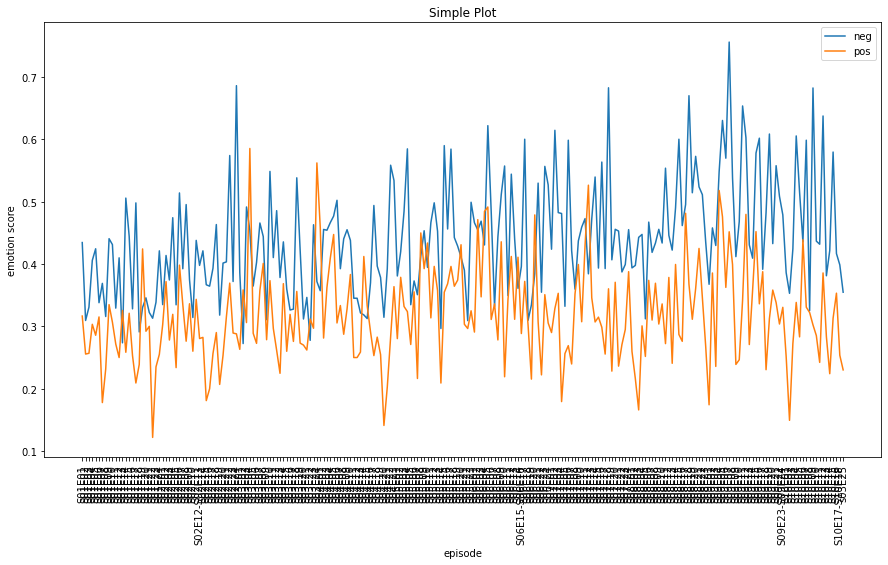

In [16]:
import matplotlib.pyplot as plt
# plt.plot(test["negative"])

plt.figure(figsize=(15, 8))
plt.plot(test['positive'], label='neg')
plt.plot(test['negative'], label='pos')
plt.xlabel('episode')
plt.ylabel('emotion score')
plt.xticks(rotation=90)
plt.title("Simple Plot")
plt.legend();


plt.show()

In [17]:
season_finale = friends.groupby('season').last()
sfinales = season_finale['id'].tolist()
print(sfinales)

['S01E24', 'S02E24', 'S03E24', 'S04E23', 'S05E23', 'S06E24', 'S07E24', 'S08E23', 'S09E23-S09E24', 'S10E17-S10E18', 's03E25']


In [21]:
sfins = test.loc[sfinales]
rest = test.drop(sfinales)

<AxesSubplot:>

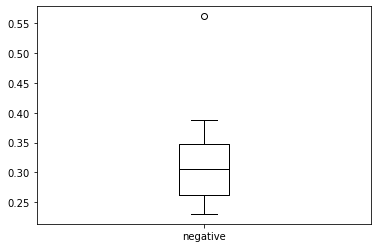

In [28]:
sfins.boxplot(column=['negative'], grid=False, color='black')


<AxesSubplot:>

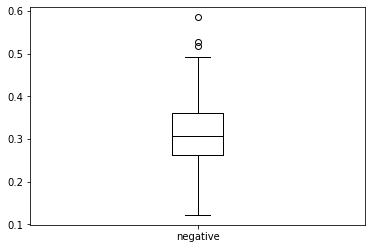

In [29]:

rest.boxplot(column=['negative'], grid=False, color='black')

<AxesSubplot:>

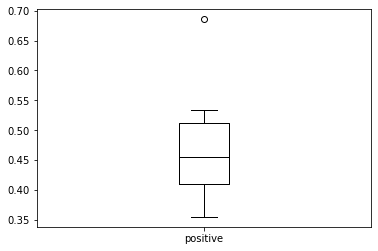

In [30]:
sfins.boxplot(column=['positive'], grid=False, color='black')

<AxesSubplot:>

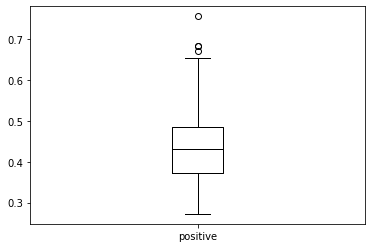

In [31]:
rest.boxplot(column=['positive'], grid=False, color='black')